Data.gov
Source: https://catalog.data.gov/dataset/consumer-complaint-database#topic=consumer_navigation

# TBD insert description of analysis here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [58]:
"""  Used to see all rows of a data frame without permanently resetting maximum displayed rows."""

def print_full(x):
    pd.set_option('display.max_rows', len(x)) 
    print(x)
    pd.reset_option('display.max_rows')

def print_len(data, int):
    pd.set_option('display.max_rows', int)
    print(data)
    pd.reset_option('display.max_rows')

In [3]:
complaints = pd.read_csv('Consumer_Complaints.csv')

In [4]:
print( len(complaints))
complaints.head()

1465999


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,08/09/2015,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,08872,NaN,Consent not provided,Web,08/09/2015,Closed with non-monetary relief,Yes,No,1509954
1,02/06/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Ocwen Financial Corporation,CA,939XX,NaN,NaN,Referral,02/10/2014,Closed with explanation,Yes,No,700599
2,01/29/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",NY,10801,NaN,Consent not provided,Web,01/30/2019,Closed with non-monetary relief,Yes,NaN,3136759
3,08/19/2015,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,Company chooses not to provide a public response,WELLS FARGO & COMPANY,CA,94526,NaN,Consent not provided,Web,08/19/2015,Closed with explanation,Yes,No,1527601
4,03/04/2016,Credit card,NaN,Billing disputes,NaN,I am dissatisfied with the current outcome of ...,NaN,DISCOVER BANK,NV,891XX,NaN,Consent provided,Web,03/04/2016,Closed with explanation,Yes,Yes,1816726


## Clean Data (A):
* Drop unnecessary columns. This analysis will focus on product/sub-products that received the most complaints,and the issue/sub-issue related to those products.
* Rename columns for ease of use.
* * Convert dates to date_time type.

[To Do:] Check for null values

In [5]:
cols_dropped = ['Consumer complaint narrative', 'Company public response', 'Tags', 
                'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Timely response?', 
                'Complaint ID']

complaints.drop(cols_dropped, axis = 1, inplace = True)

In [6]:
# Reference: https://www.dataquest.io/blog/pandas-cheat-sheet/
complaints.columns = ['date_received', 'product', 'sub_product', 
                      'issue', 'sub_issue', 
                      'company', 'state', 'zip', 
                      'comp_response_to_consumer',
                      'disputed']


In [7]:
complaints['date_received'] = pd.to_datetime(complaints['date_received'], format = '%m/%d/%Y') 


## Investigate Data (1)
* Review column names and object types (all 'object' are strings, and therefore could require additional cleaning).
* **TO DO: REVIEW PANDAS OBJECTS BEFORE FINALIZING THIS MARKDOWN**
* Identify number of products (18) and subproducts (77).
* Identify most complained about products and subproducts.


In [8]:
print( complaints.info() )
print( '\n')
print( complaints.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465999 entries, 0 to 1465998
Data columns (total 10 columns):
date_received                1465999 non-null datetime64[ns]
product                      1465999 non-null object
sub_product                  1230834 non-null object
issue                        1465999 non-null object
sub_issue                    911781 non-null object
company                      1465999 non-null object
state                        1441644 non-null object
zip                          1329548 non-null object
comp_response_to_consumer    1465998 non-null object
disputed                     768480 non-null object
dtypes: datetime64[ns](1), object(9)
memory usage: 111.8+ MB
None


date_received                datetime64[ns]
product                              object
sub_product                          object
issue                                object
sub_issue                            object
company                              object
state              

In [9]:
""" Check total number of products and sub-products. """

print("Products: ", len(complaints['product'].unique()))
print("Sub-products: ", len(complaints['sub_product'].unique() ))

Products:  18
Sub-products:  77


Credit reporting, credit repair services, or other personal consumer reports    319974
Mortgage                                                                        292752
Debt collection                                                                 274659
Credit reporting                                                                140432
Credit card                                                                      89190
Bank account or service                                                          86206
Credit card or prepaid card                                                      64625
Student loan                                                                     55725
Checking or savings account                                                      54987
Consumer Loan                                                                    31604
Vehicle loan or lease                                                            14927
Money transfer, virtual currency, or money 

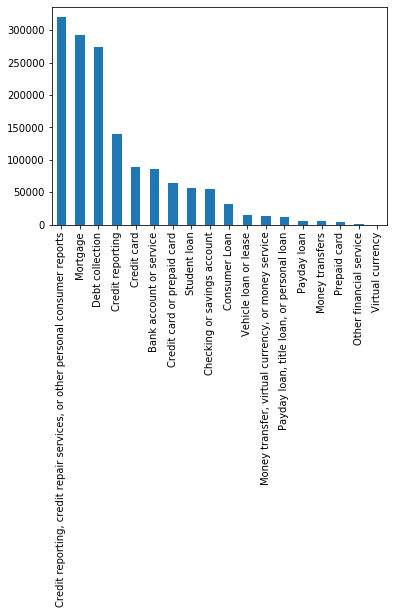

In [10]:
""" Display products sorted by # of complaints """
products = complaints['product'].value_counts()

print(complaints['product'].value_counts())
print('\n')

complaints['product'].value_counts().plot(kind='bar')

In [11]:
""" Review all sub-products
Recall: print_full defined above, to display all rows """

print_full(complaints['sub_product'].value_counts())

Credit reporting                              314241
Checking account                              100452
Other mortgage                                 86635
Conventional fixed mortgage                    70613
I do not know                                  56682
General-purpose credit card or charge card     49907
Other (i.e. phone, health club, etc.)          44544
Other debt                                     38437
Conventional home mortgage                     38006
FHA mortgage                                   33838
Credit card                                    28698
Credit card debt                               27284
Conventional adjustable mortgage (ARM)         25380
Federal student loan servicing                 25198
Non-federal student loan                       25164
Medical                                        21187
Medical debt                                   20952
Other bank product/service                     17825
Vehicle loan                                  

In [22]:
""" Check which products the 'I do not know' sub_product is most found in """

idk_bool = complaints['sub_product'] == 'I do not know' # Bool for all sub_products with "I do not know" as answer
print( complaints['product'][idk_bool].value_counts() )

""" Check what other sub_products exist within the 'Debt collection' product """
print( complaints['sub_product'][complaints['product'] == 'Debt collection'].value_counts())

Debt collection    56682
Name: product, dtype: int64


I do not know                            56682
Other (i.e. phone, health club, etc.)    44544
Other debt                               38437
Credit card                              28698
Credit card debt                         27284
Medical                                  21187
Medical debt                             20952
Payday loan                               7563
Mortgage                                  4809
Auto debt                                 4160
Payday loan debt                          3980
Auto                                      3755
Mortgage debt                             2973
Non-federal student loan                  2881
Federal student loan                      2475
Federal student loan debt                 2251
Private student loan debt                 2028
Name: sub_product, dtype: int64

In [83]:
""" Check in which product categories the sub_product 'Other (i.e. phone, health club, etc.) exists.
Result: only in 'Debt collection'
"""

complaints[complaints['sub_product'] == 'Other (i.e. phone, health club, etc.)']['product'].value_counts()

Debt collection    44544
Name: product, dtype: int64

## Observations:
* "I do not know" is the 5th most answered sub-product. All of these are part of the "debt collection" product.
* There are two 'other' subproducts within the 'Debt collection' product. 

Several other sub-product categories are redundant:
* Credit card / credit card or prepaid card / prepaid card
* Money transfers / money transfer, virtual currency, or money service / virtual currency
* Payday loan / payday loan, title loan, orpersonal loan / consumer loan

## Clean Data (B):
* Rename and consolidate 'I do not know' and 'Other (i.e.phone, health club, etc.)' sub_product into 'Other debt' within
    the 'Debt collection' product.
* TBD: The following section sorts these aggregate product categories into other product categories that already exist.

In [104]:
complaints['sub_product'] = complaints['sub_product'].str.replace('I do not know', 'Other debt')
complaints['sub_product'] = complaints['sub_product'].str.replace('Other (i.e. phone, health club, etc.)', 'Other debt', 
                                                                 regex = False) 

"""
Note: str.replace(regex = False) will treat the string being replace as a literal rather than a regex expression. 
Necessary to parse the parantheses in 'Other (i.e. phone, health club, etc.)', which would otherwise be
treated as capture groups.
see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html 
"""

# Confirm subproducts have been renamed
print_full(complaints['sub_product'].value_counts())

Credit reporting                              314241
Other debt                                    139663
Checking account                              100452
Other mortgage                                 86635
Conventional fixed mortgage                    70613
General-purpose credit card or charge card     49907
Conventional home mortgage                     38006
FHA mortgage                                   33838
Credit card                                    28698
Credit card debt                               27284
Conventional adjustable mortgage (ARM)         25380
Federal student loan servicing                 25198
Non-federal student loan                       25164
Medical                                        21187
Medical debt                                   20952
Other bank product/service                     17825
Vehicle loan                                   17782
Installment loan                               13374
Loan                                          

In [85]:
print_full(complaints[complaints['product'] == 'Debt collection']['sub_product'].value_counts())

Other debt                               95119
Other (i.e. phone, health club, etc.)    44544
Credit card                              28698
Credit card debt                         27284
Medical                                  21187
Medical debt                             20952
Payday loan                               7563
Mortgage                                  4809
Auto debt                                 4160
Payday loan debt                          3980
Auto                                      3755
Mortgage debt                             2973
Non-federal student loan                  2881
Federal student loan                      2475
Federal student loan debt                 2251
Private student loan debt                 2028
Name: sub_product, dtype: int64


In [39]:
# Remove "I do not know" label from all subproducts"
complaints['sub_product'][complaints['sub_product'] == 'I do not know'].str.replace('I do not know', 'Other debt')
# complaints['sub_product'].str.replace('I do not know', 'Other debt')
# complaints.drop(complaints[complaints['sub_product'] == 'I do not know'].index, inplace = True)

9          Other debt
62         Other debt
72         Other debt
96         Other debt
140        Other debt
              ...    
1465939    Other debt
1465961    Other debt
1465968    Other debt
1465974    Other debt
1465998    Other debt
Name: sub_product, Length: 56682, dtype: object

In [14]:
complaints['product'].value_counts()



Credit reporting, credit repair services, or other personal consumer reports    319974
Mortgage                                                                        292752
Debt collection                                                                 217977
Credit reporting                                                                140432
Credit card                                                                      89190
Bank account or service                                                          86206
Credit card or prepaid card                                                      64625
Student loan                                                                     55725
Checking or savings account                                                      54987
Consumer Loan                                                                    31604
Vehicle loan or lease                                                            14927
Money transfer, virtual currency, or money 

In [15]:
complaints.loc[complaints['product'] == 'Consumer Loan'] = 'Consumer loan' # for consistency's sake

In [16]:
# This cell was used as aid to help sort sub_products into correct product groups, out of mixed groups

## Check Product 1
credit_or_prepaid_bool = complaints['product'] == 'Credit card or prepaid card'
credit_or_prepaid_cards = complaints[credit_or_prepaid_bool]
print("Credit or prepaid card sub_products:", 
      '\n', 
      credit_or_prepaid_cards['sub_product'].value_counts(),
     '\n')

## Check Product 1
## No sub_product for credit cards
credit_card_bool = complaints['product'] == 'Credit card'
credit_cards = complaints[credit_card_bool]

print("Credit cards sub_products:", 
      '\n', 
      credit_cards['sub_product'].value_counts(),
     '\n')

# Check Product 1
prepaid_bool = complaints['product'] == 'Prepaid card'
prepaid_cards = complaints[prepaid_bool]
print("Prepaid cards sub_products:",
      '\n',
      prepaid_cards['sub_product'].value_counts(),
      '\n')

mt_vc_ms_bool = complaints['product'] == 'Money transfer, virtual currency, or money service'
mt_vc_ms_subproducts = complaints[mt_vc_ms_bool]
print("Money transfer, virtual currency, or money service sub_products:", 
      '\n', 
      mt_vc_ms_subproducts['sub_product'].value_counts(),
     '\n')

Credit or prepaid card sub_products: 
 General-purpose credit card or charge card    49907
Store credit card                             10812
General-purpose prepaid card                   2298
Government benefit card                        1081
Payroll card                                    270
Gift card                                       251
Student prepaid card                              6
Name: sub_product, dtype: int64 

Credit cards sub_products: 
 Series([], Name: sub_product, dtype: int64) 

Prepaid cards sub_products: 
 General purpose card                      1752
Mobile wallet                              418
Payroll card                               411
Gift or merchant card                      402
Government benefit payment card            389
ID prepaid card                            207
Other special purpose card                 191
Transit card                                37
Electronic Benefit Transfer / EBT card      12
Name: sub_product, dtype: int64 

M

In [17]:
# This cell eliminates redundant product groups
## 'Credit card and prepaid card'
# Setting with copy warning solution found here: https://www.dataquest.io/blog/settingwithcopywarning/


# Credit & prepaid cards
complaints.loc[complaints['sub_product'] == 'General-purpose credit card or charge card', 'product'] = 'Credit card'
complaints.loc[complaints['sub_product'] == 'Store credit card', 'product'] = 'Credit card'

complaints.loc[complaints['sub_product'] == 'General-purpose prepaid card', 'product'] = 'Prepaid card'
complaints.loc[complaints['sub_product'] == 'Government benefit card', 'product'] = 'Prepaid card'
complaints.loc[complaints['sub_product'] == 'Payroll card', 'product'] = 'Prepaid card'
complaints.loc[complaints['sub_product'] == 'Gift card', 'product'] = 'Prepaid card'
complaints.loc[complaints['sub_product'] == 'Student prepaid card', 'product'] = 'Prepaid card'

# Money transfers, virtual currency, or money service
# Display sub_products in 'Virtual currency' product group. Only 2 types, not many data points.
print ( complaints.loc[complaints['product'] == 'Virtual currency', 'sub_product'].value_counts() )

complaints.loc[complaints['sub_product'] == 'Virtual currency', 'product'] = 'Virtual currency'
complaints[complaints['sub_product'] == 'Virtual currency'] # remove when complete

complaints.loc[complaints['sub_product'] == 'Domestic (US) money transfer', 'product'] = 'Money transfers'
complaints.loc[complaints['sub_product'] == 'International money transfer', 'product'] = 'Money transfers'
complaints.loc[complaints['sub_product'] == 'Foreign currency exchange', 'product'] = 'Money transfers'
complaints.loc[complaints['sub_product'] == 'Mobile or digital wallet', 'product'] = 'Money transfers'

# Rename trimmed product group 
complaints.loc[complaints['product'] == 'Money transfer, virtual currency, or money service', 'product'] = 'Money service'

# Payday & consumer loans
complaints.loc[(complaints['sub_product'] == 'Payday loan') &  
               (complaints['product'] == 'Payday loan, title loan, or personal loan'), 'product'] = 'Payday loan'

complaints.loc[(complaints['sub_product'] == 'Personal line of credit') &  
               (complaints['product'] == 'Payday loan, title loan, or personal loan'), 'product'] = 'Consumer loan'

complaints.loc[(complaints['sub_product'] == 'Installment loan') &  
               (complaints['product'] == 'Payday loan, title loan, or personal loan'), 'product'] = 'Consumer loan'

complaints.loc[(complaints['sub_product'] == 'Title loan') &  
               (complaints['product'] == 'Payday loan, title loan, or personal loan'), 'product'] = 'Consumer loan'

complaints.loc[(complaints['sub_product'] == 'Pawn loan') &  
               (complaints['product'] == 'Payday loan, title loan, or personal loan'), 'product'] = 'Consumer loan'

# Credit reporting
complaints.loc[complaints['product'] == 'Credit reporting, credit repair services, or other personal consumer reports', 
               'product'] = 'Credit reporting'

Domestic (US) money transfer    17
International money transfer     1
Name: sub_product, dtype: int64


In [18]:
# print ( complaints.loc[complaints['product'] == 'Money transfers', 'sub_product'].value_counts() )



complaints.loc[complaints['product'] == 'Credit reporting', 'sub_product'].value_counts()

# print ( complaints.loc[complaints['product'] == 'Payday loan, title loan, or personal loan', 'sub_product'].value_counts() ) 
# print('\n')
# print ( complaints.loc[complaints['product'] == 'Consumer loan', 'sub_product'].value_counts() ) 
# print('\n')
# print ( complaints.loc[complaints['product'] == 'Payday loan', 'sub_product'].value_counts() ) 


Credit reporting                  314241
Other personal consumer report      4599
Credit repair services              1133
Conventional home mortgage             1
Name: sub_product, dtype: int64

In [19]:
complaints['product'].value_counts()

Credit reporting               460406
Mortgage                       292752
Debt collection                217977
Credit card                    149909
Bank account or service         86206
Student loan                    55725
Checking or savings account     54987
Consumer loan                   39591
Money transfers                 15248
Vehicle loan or lease           14927
Payday loan                      9070
Prepaid card                     7725
Virtual currency                 2484
Money service                    1309
Other financial service          1001
Name: product, dtype: int64

To do:
* Then, create exploratory graphic that lays them next to eachother


In [20]:
# REVISION: Do this by product category manually, then find a way to automate it later
## Create a dict w/ the product:sub_product key:value pairs?

mortgage_bool = complaints['product'] == 'Mortgage'
mortgage_subproducts = complaints[mortgage_bool]['sub_product'].value_counts()

debt_col_bool = complaints['product'] == 'Debt collection'
debt_col_subproducts = complaints[debt_col_bool]['sub_product'].value_counts()

credit_reporting_bool = complaints['product'] == 'Credit reporting'
credit_rep_subproducts = complaints[credit_reporting_bool]['sub_product'].value_counts()

credit_card_bool = complaints['product'] == 'Credit card'
credit_card_subproducts = complaints[credit_card_bool]['sub_product'].value_counts

bank_account_bool = complaints['product'] == 'Bank account or service'
bank_account_subproducts = complaints[bank_account_bool]['sub_product'].value_counts

student_loan_bool = complaints['product'] == 'Studen loan'
studen_loan_subproducts = complaints[student_loan_bool]['sub_product'].value_counts()

checking_savings_bool = complaints['product'] == 'Checking or savings account'
checking_savings_subproducts = complaints[checking_savings_bool]['sub_product'].value_counts()

consumer_loan_bool = complaints['product'] == 'Consumer Loan'
consumer_loan_subproducts = complaints[consumer_loan_bool]['sub_product'].value_counts()

vehicle_loan_bool = complaints['product'] == 'Vehicle loan or lease'
vehicle_loan_subproducts = complaints[vehicle_loan_bool]['sub_product'].value_counts()

## Check Product 2
mt_bool = complaints['product'] == 'Money transfers'
mt_subproducts = complaints[mt_bool]['sub_product'].value_counts()

ms_bool = complaints['product'] == 'Money service'
ms_subproducts = complaints[ms_bool]['sub_product'].value_counts()

payday_bool = complaints['product'] == 'Payday loan'
payday_subproducts = complaints[payday_bool]['sub_product'].value_counts()

mt_bool = complaints['product'] == 'Money transfers'
mt_subproducts = complaints[mt_bool]['sub_product'].value_counts()

prepaid_bool = complaints['product'] == 'Prepaid card'
prepaid_subproducts = complaints[prepaid_bool]['sub_product'].value_counts()

other_bool = complaints['product'] == 'Other financial service'
other_subproducts = complaints[other_bool]['sub_product'].value_counts()

vc_bool = complaints['product'] == 'Virtual currency'
vc_subproducts = complaints[vc_bool]['sub_product'].value_counts()








In [21]:
## Check Product 2
ms_bool = complaints['product'] == 'Money service'
ms_subproducts = complaints[ms_bool]['sub_product'].value_counts()
ms_subproducts

Debt settlement                        365
Traveler's check or cashier's check    317
Money order                            276
Check cashing service                  233
Refund anticipation check              118
Name: sub_product, dtype: int64

In [22]:
products = complaints['product'].value_counts()
products = products.to_frame() # Otherwise products is a series and additional column cannot be added

# Calculate number of complaints by % of total
products.columns = ['num_complaints']
products['perc_total'] = products['num_complaints']/sum(products['num_complaints'])

print(products)

                             num_complaints  perc_total
Credit reporting                     460406    0.326687
Mortgage                             292752    0.207726
Debt collection                      217977    0.154669
Credit card                          149909    0.106370
Bank account or service               86206    0.061169
Student loan                          55725    0.039540
Checking or savings account           54987    0.039017
Consumer loan                         39591    0.028092
Money transfers                       15248    0.010819
Vehicle loan or lease                 14927    0.010592
Payday loan                            9070    0.006436
Prepaid card                           7725    0.005481
Virtual currency                       2484    0.001763
Money service                          1309    0.000929
Other financial service                1001    0.000710


In [23]:
sub_products = complaints['sub_product'].value_counts()
sub_products = sub_products.to_frame() # Otherwise sub_products is a series and additional column cannot be added

# Calculate number of complaints by % of total
sub_products.columns = ['num_complaints']
sub_products['perc_total'] = sub_products['num_complaints']/sum(sub_products['num_complaints'])

print(sub_products)

                                            num_complaints  perc_total
Credit reporting                                    314241    0.267632
Checking account                                    100452    0.085553
Other mortgage                                       86635    0.073785
Conventional fixed mortgage                          70613    0.060140
General-purpose credit card or charge card           49907    0.042505
...                                                    ...         ...
Traveler’s/Cashier’s checks                             88    0.000075
Transit card                                            37    0.000032
Pawn loan                                               27    0.000023
Electronic Benefit Transfer / EBT card                  12    0.000010
Student prepaid card                                     6    0.000005

[74 rows x 2 columns]


In [24]:
print('Credit report', '\n', complaints.loc[complaints['product'] == 'Credit reporting', 'sub_product'].value_counts() )
print('\n')

print('Mortgage', '\n', complaints.loc[complaints['product'] == 'Mortgage', 'sub_product'].value_counts() )
print('\n')

print('Debt collection', '\n', complaints.loc[complaints['product'] == 'Debt collection', 'sub_product'].value_counts() )
print('\n')

print('Credit card', '\n', complaints.loc[complaints['product'] == 'Credit card', 'sub_product'].value_counts() )
print('\n')

print('Bank account or service', '\n', complaints.loc[complaints['product'] == 'Bank account or service', 'sub_product'].value_counts() )
print('\n')

# I wonder why complaints for fixed mortgages are twice as high as ARMs?
# Difficult to know with the "other mortgage" category.

Credit report 
 Credit reporting                  314241
Other personal consumer report      4599
Credit repair services              1133
Conventional home mortgage             1
Name: sub_product, dtype: int64


Mortgage 
 Other mortgage                                86635
Conventional fixed mortgage                   70613
Conventional home mortgage                    38005
FHA mortgage                                  33838
Conventional adjustable mortgage (ARM)        25380
Home equity loan or line of credit            11624
Other type of mortgage                        10036
VA mortgage                                    8442
Home equity loan or line of credit (HELOC)     4409
Reverse mortgage                               3108
Second mortgage                                 662
Name: sub_product, dtype: int64


Debt collection 
 Other (i.e. phone, health club, etc.)    44544
Other debt                               38437
Credit card                              28698
Credit car

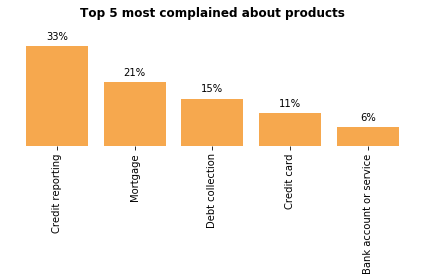

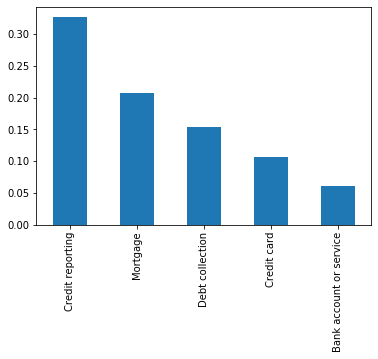

In [25]:
prod_greater_5 = products[products['perc_total'] > 0.05]
prod_less_5 = products[products['perc_total'] < 0.05]

# Prod greater than 5%
# prod_greater_5_name = prod_greater_5

prod_greater_5_type = prod_greater_5.index.values

# plt.bar(prod_greater_5_type, prod_greater_5['perc_total'])
# # plt.tick_params(bottom = "off", top = "off", left = "off", right = "off")


fig, ax = plt.subplots()
ax.bar(prod_greater_5_type, prod_greater_5['perc_total'], color=[246/255, 168/255, 78/255])

ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)



# Function definition from: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}%".format(y_value*100)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

# Turn off tick labels
# Source: https://stackoverflow.com/questions/37039685/hide-axis-values-in-matplotlib
ax.set_yticklabels([])


plt.yticks([])

plt.title('Top 5 most complained about products', fontweight = 'bold', ha = 'center', pad = 25)
plt.xticks(rotation = 90)


fig.tight_layout()
plt.show()

prod_greater_5['perc_total'].plot(kind = 'bar')

In [26]:
print( complaints.loc[complaints['product'] == 'Credit reporting', 'issue'].value_counts() )
print('\n')
print( complaints.loc[complaints['product'] == 'Mortgage', 'issue'].value_counts() )
print('\n')
print( complaints.loc[complaints['product'] == 'Debt collection', 'issue'].value_counts() )
print('\n')
print( complaints.loc[complaints['product'] == 'Credit card', 'issue'].value_counts() )
print('\n')
print( complaints.loc[complaints['product'] == 'Bank account or service', 'issue'].value_counts() )


Incorrect information on your report                                                190027
Incorrect information on credit report                                              102686
Problem with a credit reporting company's investigation into an existing problem     70390
Improper use of your report                                                          40244
Credit reporting company's investigation                                             16883
Unable to get credit report/credit score                                             10859
Unable to get your credit report or credit score                                      6916
Problem with fraud alerts or security freezes                                         6712
Improper use of my credit report                                                      5580
Credit monitoring or identity protection                                              4424
Credit monitoring or identity theft protection services                               3386

Account opening, closing, or management     37961
Deposits and withdrawals                    22851
Problems caused by my funds being low       11845
Making/receiving payments, sending money     7404
Using a debit or ATM card                    6145
Name: issue, dtype: int64


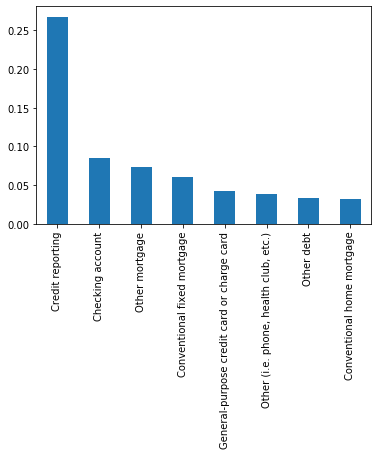

In [27]:
# Display sub-products by % of total complaints by sub-products
# REVISION: Add threshold variable

sub_prod_greater_3 = sub_products[sub_products['perc_total'] > 0.03]
sub_prod_less_3 = sub_products[sub_products['perc_total'] < 0.03]

sub_prod_greater_3['perc_total'].plot(kind = 'bar')

Possible Next steps:
* Basecamp to display zip codes with most complaints? What types of companies are most complained about by state?

